# About the notebook

In [1]:
suppressWarnings(library(tidyverse))
suppressWarnings(library(immunoClust))

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.0     ✔ purrr   0.2.5
✔ tibble  1.4.2     ✔ dplyr   0.7.8
✔ tidyr   0.8.2     ✔ stringr 1.3.1
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: grid
Loading required package: lattice
Loading required package: flowCore

Attaching package: ‘flowCore’

The following object is masked from ‘package:base’:

    sort



# 

In [2]:
data(dat.fcs)
dat.fcs

flowFrame object '2d36b4cf-da0f-4b8d-9a4c-fc7e4f5fccc8'
with 10000 cells and 7 observables:
               name desc  range   minRange maxRange
$P2           FSC-A <NA> 262144    0.00000   262143
$P5           SSC-A <NA> 262144 -111.00000   262143
$P8          FITC-A CD14 262144 -111.00000   262143
$P9            PE-A CD19 262144 -111.00000   262143
$P12          APC-A CD15 262144 -111.00000   262143
$P13      APC-Cy7-A  CD4 262144 -111.00000   262143
$P14 Pacific Blue-A  CD3 262144  -98.93999   262143
171 keywords are stored in the 'description' slot

In [5]:
class(dat.fcs)

[1] "flowFrame"
attr(,"package")
[1] "flowCore"

In [18]:
exprs(dat.fcs) %>% head

FSC-A,SSC-A,FITC-A,PE-A,APC-A,APC-Cy7-A,Pacific Blue-A
70343.1,98438.49,340.26,149.46,2069.76,126.72,17.34
86062.5,58938.12,25023.42,6695.49,362.24,561.92,21.42
12121.2,11354.19,165.36,85.86,335.36,48.64,-3.06
71526.6,204319.78,284.61,308.46,2339.84,284.16,84.66
96332.4,46992.45,11948.85,3401.01,259.84,471.04,53.04
43360.2,114141.34,368.88,100.17,2150.40,331.52,77.52


In [19]:
parameters(dat.fcs)

An object of class 'AnnotatedDataFrame'
  rowNames: $P2 $P5 ... $P14 (7 total)
  varLabels: name desc ... maxRange (5 total)
  varMetadata: labelDescription

In [20]:
parameters(dat.fcs) %>% pData

,name,desc,range,minRange,maxRange
$P2,FSC-A,NA,262144,0.00000,262143
$P5,SSC-A,NA,262144,-111.00000,262143
$P8,FITC-A,CD14,262144,-111.00000,262143
$P9,PE-A,CD19,262144,-111.00000,262143
$P12,APC-A,CD15,262144,-111.00000,262143
$P13,APC-Cy7-A,CD4,262144,-111.00000,262143
$P14,Pacific Blue-A,CD3,262144,-98.93999,262143


```
cell.process {immunoClust}

Clustering of Cell-events in the immunoClust-pipeline
```

***Description***  
**This function performs iterative model based clustering on cell-event data. It takes the observed cell-event data as major input and returns an object of class immunoClust, which contains the fitted mixture model parameter and cluster membership information. The additional arguments control the routines for data preprocessing, major loop and EMt-iteration, the model refinement routine and transformation estimation.**


In [4]:
pars = c("FSC-A", "SSC-A", "FITC-A", "PE-A", "APC-A", "APC-Cy7-A", "Pacific Blue-A")
res.fcs = cell.process(dat.fcs, parameters = pars)

filtered from above:318
filtered from below:0

Test cluster 1 for sub-clustering
EM takes 0.017 mins minutes
cluster 1 has 2 sub-cluster at 2, ICL=149
cluster 1 has 2 sub-cluster at 2, ICL=0
Model Refinement takes 0.017 mins minutes

Fit Model 1 of (6/10) K=1->2 N=302
EM takes 0 mins minutes

Test cluster 1 for sub-clustering
EM takes 0.017 mins minutes
Test cluster 2 for sub-clustering
EM takes 0 mins minutes
cluster 1 has 2 sub-cluster at 2, ICL=133
cluster 2 has 2 sub-cluster at 2, ICL=21
cluster 1 has 2 sub-cluster at 2, ICL=0
Model Refinement takes 0.017 mins minutes

Fit Model 2 of (6/10) K=2->3 N=605
EM takes 0 mins minutes

Test cluster 1 for sub-clustering
EM takes 0 mins minutes
Test cluster 2 for sub-clustering
EM takes 0.017 mins minutes
Test cluster 3 for sub-clustering
EM takes 0.017 mins minutes
cluster 2 has 2 sub-cluster at 2, ICL=113
cluster 3 has 2 sub-cluster at 2, ICL=68
Model Refinement takes 0.033 mins minutes

Fit Model 3 of (6/10) K=3->5 N=1210
EM takes 0 mins 

In [6]:
summary(res.fcs)

** Experiment Information ** 
Experiment name: immunoClust Experiment 
Data Filename:   fcs/12443.fcs 
Parameters:   FSC-A SSC-A FITC-A PE-A APC-A APC-Cy7-A Pacific Blue-A 
Description:  NA NA CD14 CD19 CD15 CD4 CD3 

** Data Information ** 
Number of observations: 10000 
Number of parameters:   7 
Removed from above:    318 (3.18%)
Removed from below:    0 (0%)

** Transformation Information ** 
htrans-A:   0.000000 0.000000 0.010000 0.010000 0.010000 0.010000 0.010000 
htrans-B:   0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 
htrans-decade:   -1 

** Clustering Summary ** 
ICL bias: 0.30 
Number of clusters: 12 
Cluster     Proportion  Observations
       1      0.091851           890
       2      0.005914            57
       3      0.040373           391
       4      0.034162           333
       5      0.015834           154
       6      0.008024            79
       7      0.084060           827
       8      0.033546           312
       9      0.637713     

**For plotting the clustering results on cell event level, the optimised asinh-transformation has
to be applied to the raw FC data first.**

In [7]:
dat.transformed = trans.ApplyToData(res.fcs, dat.fcs)

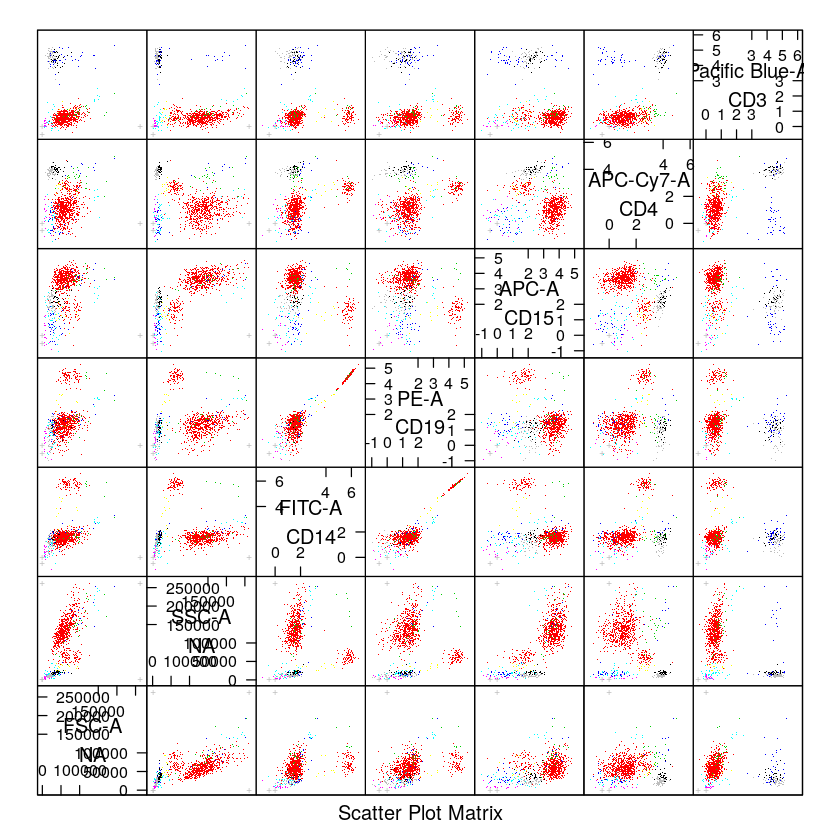

In [8]:
splom(res.fcs, dat.transformed, N=1000)

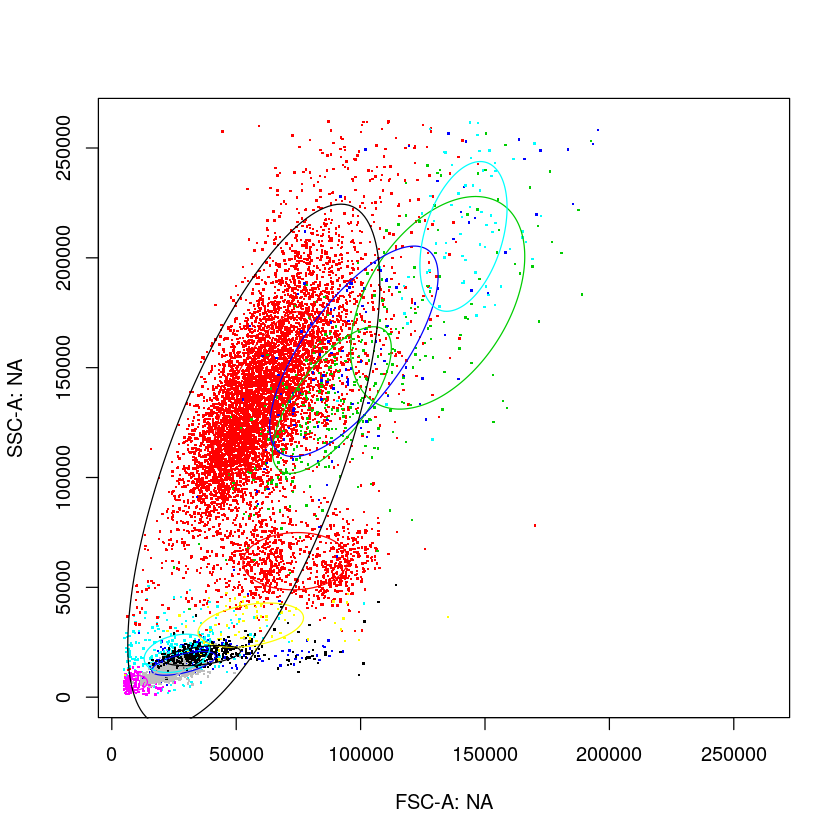

In [12]:
plot(res.fcs, data=dat.transformed, subset=c(1,2), cex = 2)

# Meta Clustering

In [3]:
data(dat.exp)
class(dat.exp)
length(dat.exp)

[1] "list"

[1] 5

In [4]:
dat.exp

[[1]]
Object of class 'immunoClust' 
This object has the following slots: 
expName, fcsName ,parameters, removed.below, removed.above, trans.a, trans.b, trans.decade, trans.scale K, N, P, w, mu, sigma, z, label, logLike, BIC, ICL

[[2]]
Object of class 'immunoClust' 
This object has the following slots: 
expName, fcsName ,parameters, removed.below, removed.above, trans.a, trans.b, trans.decade, trans.scale K, N, P, w, mu, sigma, z, label, logLike, BIC, ICL

[[3]]
Object of class 'immunoClust' 
This object has the following slots: 
expName, fcsName ,parameters, removed.below, removed.above, trans.a, trans.b, trans.decade, trans.scale K, N, P, w, mu, sigma, z, label, logLike, BIC, ICL

[[4]]
Object of class 'immunoClust' 
This object has the following slots: 
expName, fcsName ,parameters, removed.below, removed.above, trans.a, trans.b, trans.decade, trans.scale K, N, P, w, mu, sigma, z, label, logLike, BIC, ICL

[[5]]
Object of class 'immunoClust' 
This object has the following slots: 
e

In [5]:
meta <- meta.process(dat.exp, meta.bias = 0.3, scatter.subset = c(1,2))

Fit Model 1 of 10 with 3 clusters
Fit Model 2 of 10 with 11 clusters
Fit Model 3 of 10 with 28 clusters
Fit Model 4 of 10 with 30 clusters
Fit Model 5 of 10 with 32 clusters
Fit Model 6 of 10 with 30 clusters


Scatter Gating


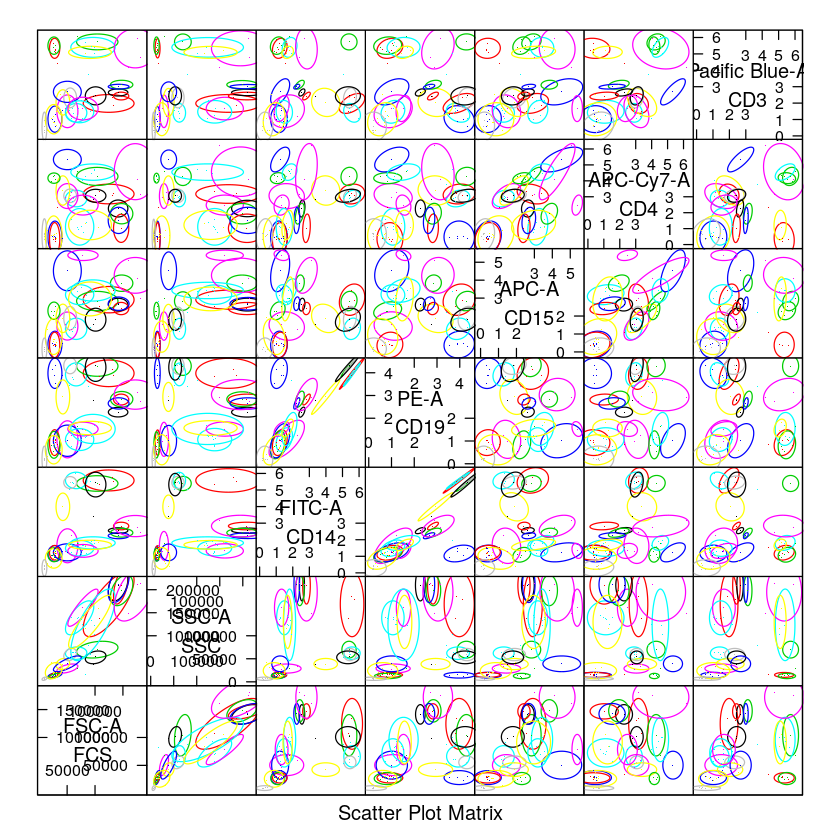

In [8]:
splom(meta$res.clusters, meta$dat.clusters$M, ellipse=TRUE)

In [12]:
meta$res.clusters

Object of class 'immunoClust' 
This object has the following slots: 
expName, fcsName ,parameters, removed.below, removed.above, trans.a, trans.b, trans.decade, trans.scale K, N, P, w, mu, sigma, z, label, logLike, BIC, ICL

In [11]:
meta$dat.clusters$M

,FSC-A FCS,SSC-A SSC,FITC-A CD14,PE-A CD19,APC-A CD15,APC-Cy7-A CD4,Pacific Blue-A CD3
12543_1,91738.047,60314.352,5.4915876,3.8225769,1.3747937,2.9462920,1.4644322
12543_2,60908.692,63018.273,5.3968653,3.7120558,1.3572662,2.9176749,1.3667309
12543_3,87669.398,79212.709,5.0478057,3.4165660,2.2201893,3.7894906,3.7167947
12543_4,133556.608,185586.291,5.5203388,3.8684921,3.3981350,3.1959194,1.8654721
12543_5,28746.423,15332.899,1.1591422,0.6050604,0.3536533,0.3764339,5.2395093
12543_6,26071.571,19742.789,0.8617514,0.4128397,0.7057964,0.5598725,0.7940267
12543_7,9333.708,6456.867,0.1979970,0.1459766,0.1622943,0.7164090,0.3047669
12543_8,57915.586,33431.834,2.2796201,1.2291976,1.2683069,3.2848929,1.1761671
12543_9,25384.950,13115.392,1.0919023,0.5309597,2.0520023,4.2862450,5.3843359
12543_10,69206.156,138147.682,1.2823269,0.8202888,3.3488714,1.0810207,1.2413163
